<a href="https://colab.research.google.com/github/jiw0n-lee/ESAA/blob/main/YB_week2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn


## 시각화를 위한 차트 / 그래프 유형

* 시각화는 통계 분석을 위한 시각화 & 비즈니스 분석을 위한 시각화로 나눠 볼 수 있음
* 비즈니스 분석을 위한 - 청중의 유형, 설득이 필요한 다양한 환경에 따라 적절하게 활용
* 통계 분석을 위한 - 비즈니스 분석과 유사하지만, 데이터 자체가 가지는 특성에 좀 더 집중하는 경향이 있음

## 정보의 종류에 따른 시각화 차트 유형

* 히스토그램
* 바 플롯
* 박스 플롯
* 바이올린 플롯
* 스캐터 플롯
* 상관 히트맵

이들 중 바 플롯을 제외한 모든 플롯들이 연속형 칼럼 값에 대한 시각화를 지원함.

* 바 플롯 - 특정 칼럼의 이산 값을 기준으로 다른 칼럼의 연속형 값을 막대 그래프로 시각화 함.
* 히스토그램 & 바이올린 플롯 - 연속형 데이터의 분포가 정규 분포인지, 왜곡되어 있는지 시각화 함.
* 박스 플롯 - 연속형 데이터의 분위를 시각화 함.
* 스캐터 플롯 - 2개의 연속형 칼럼들에 대한 분포 및 관계를 점으로 시각화 함.
* 상관 히트맵 - 다수의 연속형 칼럼들의 상관 관계를 온도를 나타내는 시각적인 컬러 기반으로 표현해 줌.


## Seaborn
* Seaborn은 X축과 Y축으로 구성된 2차원 축에서 데이터를 시각화하므로, 2개의 변수에 대한 정보를 기본적으로 표출해 줌.
* Seaborn의 대부분의 시각화 함수들은 hue라는 인자를 통해서 또는 플롯의 유형에 따라 연속형 데이터의 정보를 다른 이산형 데이터 값으로 세분화된 정보로 표현할 수 있게 만들어줘서 3개의 변수까지도 함께 시각화 할 수 있음.




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 히스토그램

In [3]:
import pandas as pd

titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA/titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


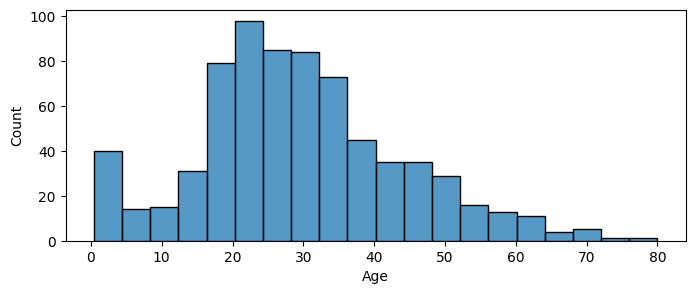

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시본에서도 plt.figure()의 figure 인자를 입력하여 전체 Figure의 크기 조절
plt.figure(figsize=(8,3))

# DataFrame의 칼럼명을 자동으로 인식해서 xlabel 값을 할당, ylabel 값은 Count로 설정.
sns.histplot(titanic_df['Age'], bins=20)
plt.show()


* 대부분의 시각화 함수들은 data, x, y를 각각 인자로 가짐.
* 히스토그램은 기본적으로 한 개의 변수만 시각화하므로 y 인자는 생략 가능
* kde=True : 히스토그램의 연속 확률분포 곡선까지 함께 시각화

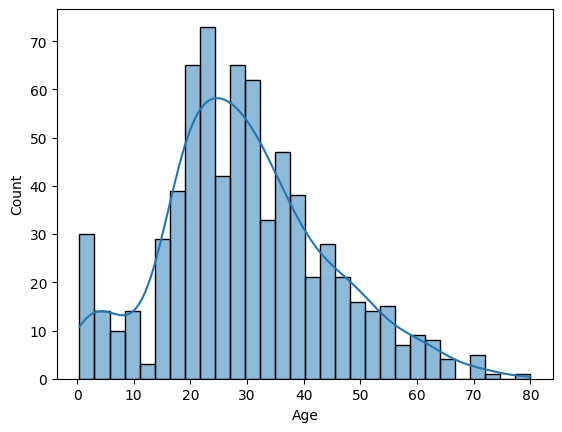

In [5]:
# sns.histplot(titanic_df['Age'], bins=30, kde=True)

sns.histplot(x='Age', data=titanic_df, bins=30, kde=True)
plt.show()

# bins=30 : 30개의 구간별 막대 그래프 도수가 그려짐

## 시본의 또 다른 히스토그램 함수인 **displot() 함수**

* displot() 함수는 Figure 레벨 함수임.
* Figure 레벨 함수 : 맷플롯립 API 사용을 최소화하고, 기본 맷플롯립에서 사용하는 기능들을 Figure 레벨 함수의 인자 등으로 대체하게 설계되었음.

<Figure size 800x400 with 0 Axes>

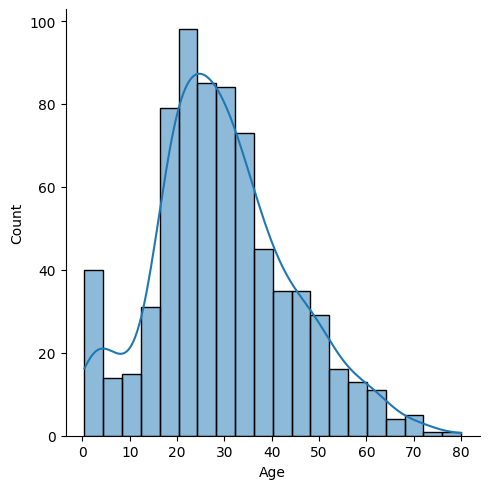

In [6]:
import seaborn as sns

# seaborn의 figure레벨 그래프는 plt.figure()로 Figure 크기를 조절할 수 없음.
plt.figure(figsize=(8,4))
sns.displot(x='Age', data=titanic_df, kde=True)
plt.show()

* plt.figure(figsize=(8,4))를 이용해 가로의 길이를 8, 세로의 길이를 4로 설정함으로써 가로가 세로의 2배 크기가 되도록 Figure를 설정했지만, 오히려 세로가 더 긴 히스토그램이 만들어짐.

* displot() 함수의 Figure의 크기를 조절하기 위한 인자로 height와 aspect가 주어지는데, height는 세로의 크기를 의미하며 aspect는 가로와 세로의 배율을 의미함.
* width와 같은 별도의 가로 크기를 설정하는 인자는 제공되지 않고, height * aspect를 적용하여 자동으로 가로의 크기가 결정됨.

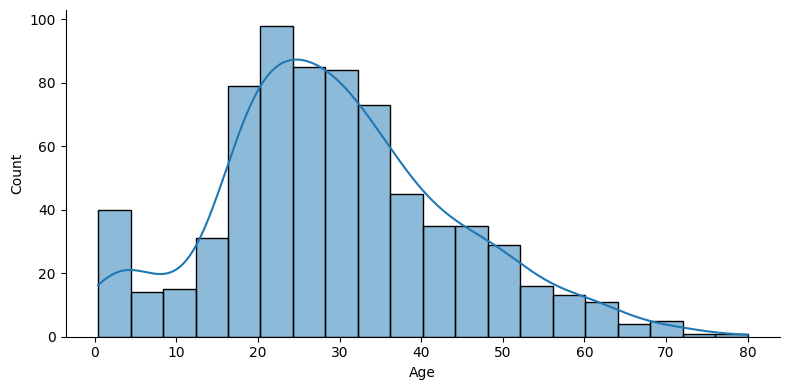

In [7]:
import seaborn as sns

sns.displot(titanic_df['Age'], kde=True, height=4, aspect=2)
plt.show()

## 카운트 플롯

* (위에서 배운) 히스토그램 - 연속형 값에 대해서 구간에 따른 건수를 시각화
* 카운트 플롯 - 이산형 값의 건수를 막대 그래프로 시각화

* 카운트 플롯은 시본의 countplot()을 사용함.


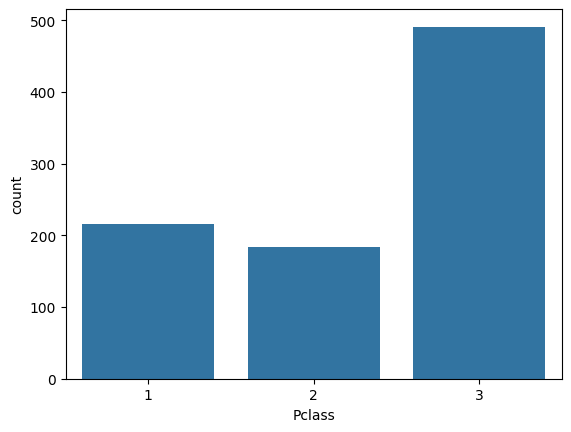

In [8]:
sns.countplot(x='Pclass', data=titanic_df)
plt.show()

## 바 플롯

* 막대 그래프 형태의 플롯
* X축 값이 이산형 값으로, 값의 종류가 너무 많지 않을 때 유용함.
* Y축 값은 Y축에 해당하는 칼럼값의 평균이나 총합으로 표현되는 연속형 값을 가짐.
* 수평 막대 그래프로 그릴 경우에는 Y축이 이산형 값, X축이 연속형 값을 가지게 설정해야 함.

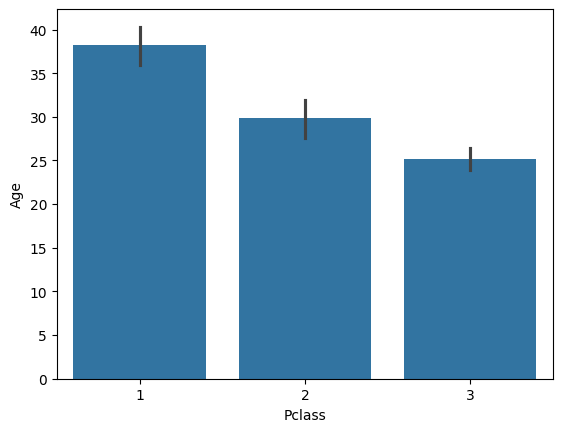

In [9]:
# 자동으로 xlabel, ylabel을 barplot()의 x 인자값인 Pclass, y 인자값이 Age로 설정.
sns.barplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

* 시본에서는 맷플롯립과 다르게 pyplot 모듈의 xlabel(), ylabel() 함수를 사용하지 않고도 X축명 Pxlass와 Y축명 Age를 자동으로 설정함.
* barplot() 함수는 기본적으로 Y축 값의 평균 값을 나타냄.
* estimator 인자값을 설정하여 평균 외에도 총합, 중앙값 등을 나타낼 수도 있음.

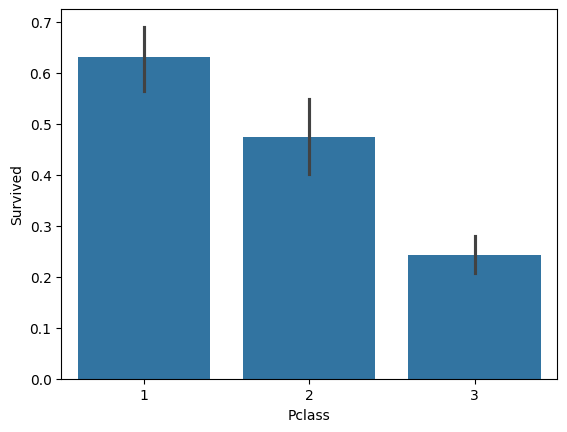

In [12]:
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.show()

* Survived 칼럼은 연속형 숫자값이 아니라 이산형 숫자값임.
* 하지만 값이 0과 1로 되어 있기에 평균값을 평균 비율로 나타낼 수 있음.
* ex) 10명의 승객 중 6명이 사망하고 4명이 생존했다면 10명 승객의 평균 Survived 값은 0.4가 됨.

### orinet 인자
* barplot() 함수는 수직 또는 수평 막대 그래프 시각화 선택을 orient 인자로 설정할 수 있음.
* orient가 v일 경우는 수직(vertical) 막대 그래프, h일 경우는 수평(horizontial) 막대 그래프를 그림.
* orient 값을 별도로 설정하지 않을 경우, barplot() 함수는 입력된 X축 값과 Y축 값의 데이터 유형을 판단하여 자동으로 수직 또는 수평 막대 그래프를 그려줌.
* 하지만, X축과 Y값이 모두 숫자형 값이면 수직 막대 그래프를 우선하여 그려줌.

### barplot() 함수의 X축, Y축 인자
* 바 플롯은 수직 막대그래프의 경우 일반적으로 X축 값을 이산형 값으로 설정하며, 이산형 값은 숫자값 또는 문자열 값 모두 가능함.
* 하지만 수직 막대 그래프의 Y축 값을 문자열 값으로 설정해서는 **안 된다**.
* barplot() 함수를 사용 할 때 만약 Y축 값을 문자열 값으로 입력하고 X축 값을 숫자형으로 입력하면 사용자가 수평 그래프를 의도하고 입력한 인자라고 판단하여, 자동으로 수평 막대 그래프로 유형을 변환해 줌.

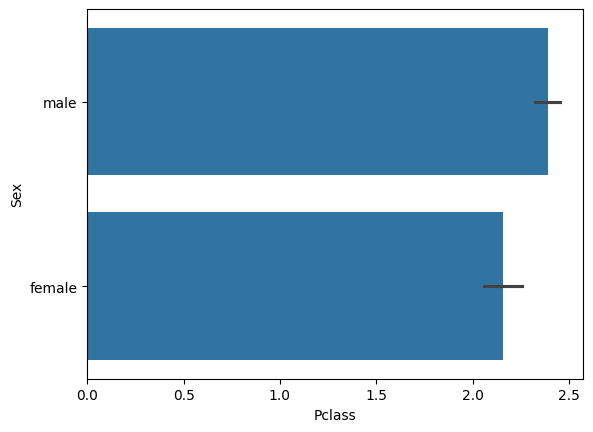

In [13]:
## y축을 문자값으로 설정하면 자동으로 수평 막대 그래프 변환
sns.barplot(x='Pclass', y='Sex', data=titanic_df)
plt.show()

* 바 플롯 생성 시 X축, Y축 값을 모두 문자열 값으로 입력하면 바 플롯이 의미하는 정보의 표현 의도와 완전히 어긋나기 때문에 오류가 발생함.

<Axes: xlabel='Name', ylabel='Sex'>

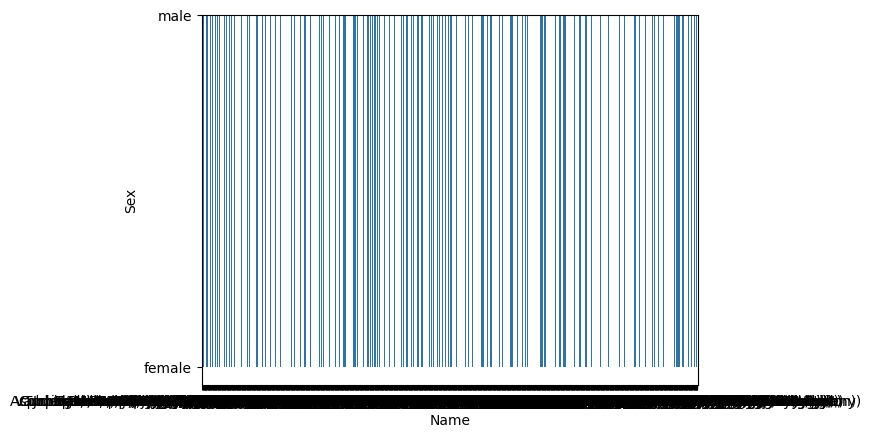

In [15]:
# x 인자로 문자열인 Name을, y 인자로 문자열인 Sex를 입력하므로 barplot은 오류를 발생.
sns.barplot(x='Name', y='Sex', data=titanic_df)

<ipython-input-16-f04ab605102e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)


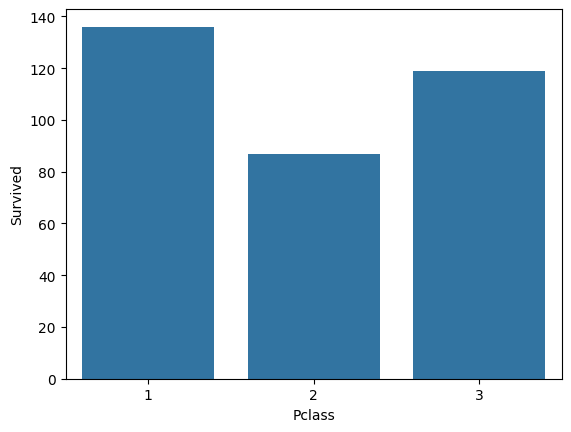

In [16]:
# estimator=sum을 적용하여 평균이 아니라 총합으로 표현.
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ci=None, estimator=sum)
plt.show()

## barplot() 함수의 hue 인자를 사용하여 시각화 정보를 추가적으로 세분화하기
* 일반적으로 2차원 평면 형태의 시각화는 X축과 Y축에 따른 2개의 정보를 시각화해주지만, barplot()함수의 hue 인자를 통해서 세부적인 추가 정보를 더해서 시각화할 수 있음.

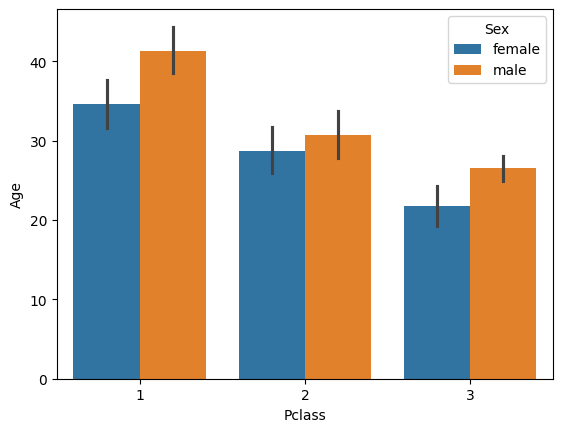

In [17]:
# 아래는 Pclass가 X축값이며 hue 파라미터로 Sex를 설정
# 개별 Pclass 값별로 Sex에 따른 Age 평균 값을 구함.
sns.barplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

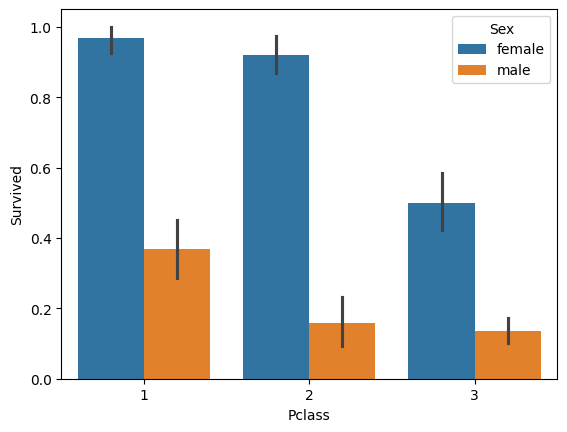

In [18]:
# 개별 Pclass 값 별로 Sex에 따른 Survived 평균값을 구함.
# Pclass가 x축 값이며 Survived가 Y축 값, hue 파라미터로 Sex를 설정
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
plt.show()

## 박스 플롯
* boxplot() 함수의 주요 인자 : x, y, data
* 분위수를 기반으로 함. -> 따라서 연속형 값에 적용해야 의미 있는 정보가 될 수 있음.
* 박스 플롯은 연속형 값에 대한 IQR분위와 최소/최대 그리고 이상치 정보를 시각화함.

* x 또는 y 인자로 연속형 값을 입력할 수 있음. y에 입력 시 수직 박스 플롯을, x에 입력 시 수평 박스 플롯을 나타냄.

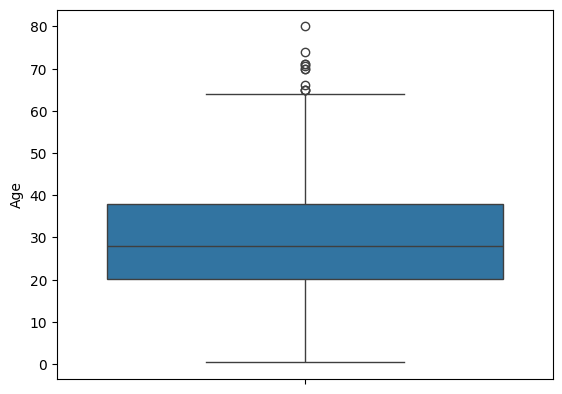

In [19]:
sns.boxplot(y='Age', data=titanic_df)
plt.show()

* 기본적으로 박스 플롯은 단일 칼럼에 대한 분위수를 기반으로 하고 있지만, 추가적인 세분화 레벨에서도 적용이 가능함.
* 추가적인 세분화 레벨로 여러 개의 수직 박스 플롯을 표현하고자 한다면, 반드시 x 인자는 이산형 값이 되어야 함.

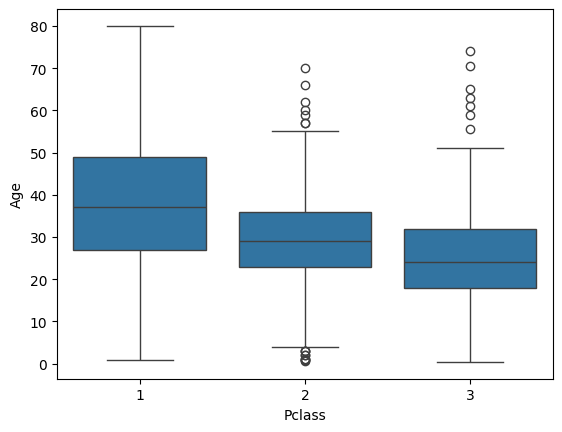

In [20]:
sns.boxplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

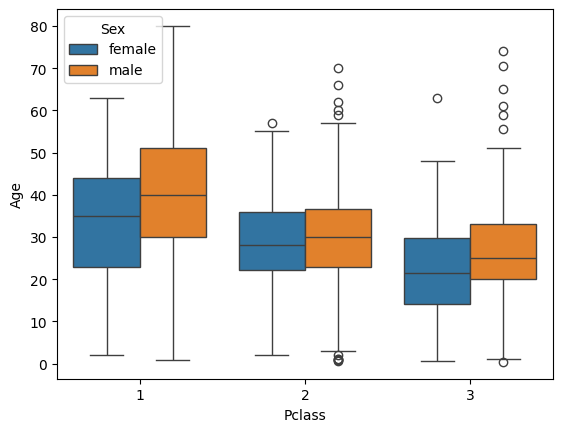

In [21]:
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

## 바이올린 플롯

* 히스토그램의 연속 확률 분포 곡선과 박스 플롯을 함께 시각화할 수 있음.
* 연속형 값에 적용해야 의미 있는 정보로 시각화 가능.
* x 또는 y 인자로 연속형 값을 입력 가능. y에 입력 시 수직 바이올린 플롯을, x에 입력 시 수평 바이올린 플롯을 나타냄.

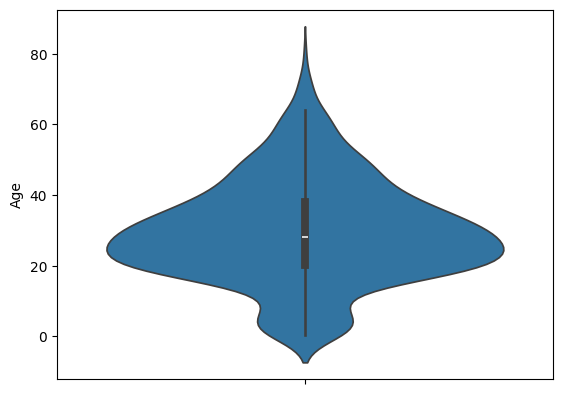

In [22]:
# Age 칼럼에 대한 수직 바이올린 플롯 시각화
sns.violinplot(y='Age', data=titanic_df)
plt.show()

* violinplot() 함수는 여러 이산값별로 여러 개의 바이올린 플롯들을 그릴 수 있음.
* 이는 여러 이산값별로 여러 개의 히스토그램 연속 확률 분포 곡선들을 그려줄 수 잇는 장점을 가지고 있음.

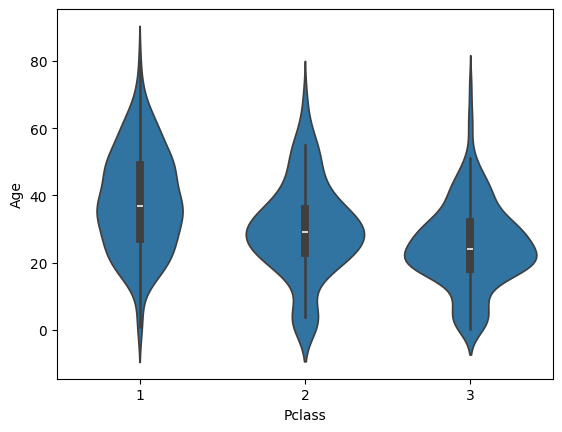

In [23]:
# x축값인 Pclass의 값별로 y축 값인 Age의 바이올린 플롯을 그림
# pClass값별 Age 데이터 분포를 비교하여 볼 수 있음.
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.show()

* violinplot() 함수 역시 hue를 이용하여 한단계 더 추가적인 세부 정보를 제공할 수 있음.

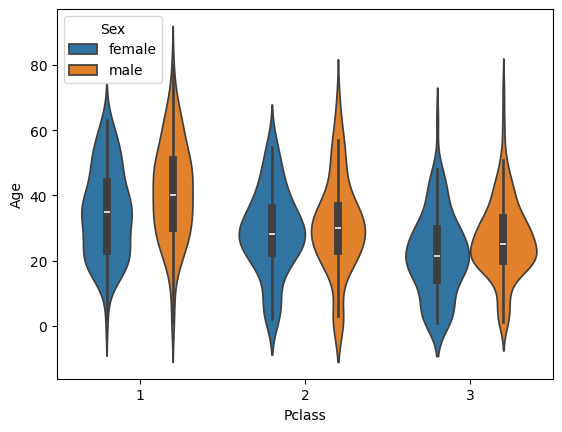

In [24]:
# x축값인 개별 Pclass 내에서 Sex값별로 y축 값인 Age의 바이올린 플롯을 그림
sns.violinplot(x='Pclass', y='Age', hue='Sex', data=titanic_df)
plt.show()

* seaborn의 histplot() 함수는 hue 기능을 제공하지만, 그보다는 violinplot() 함수가 특정 이산값에 해당하는 연속형 값의 데이터 분포도를 훨씬 더 효과적으로 시각화해주기 때문에 데이터 분석 시 활용도가 높음.

## subplots를 이용하여 시본의 다양한 그래프를 시각화

시본의 시각화 함수를 subplots로 할당된 개별 Axes 객체에 적용하는 방법 :

* 시본의 모든 Axes레벨 시각화 함수는 ax라는 인자를 가지고 있음.
* 시각화 함수 호출 시 이 ax 인자에 개별 Axes 객체를 할당하면 됨.

index: 0
index: 1
index: 2


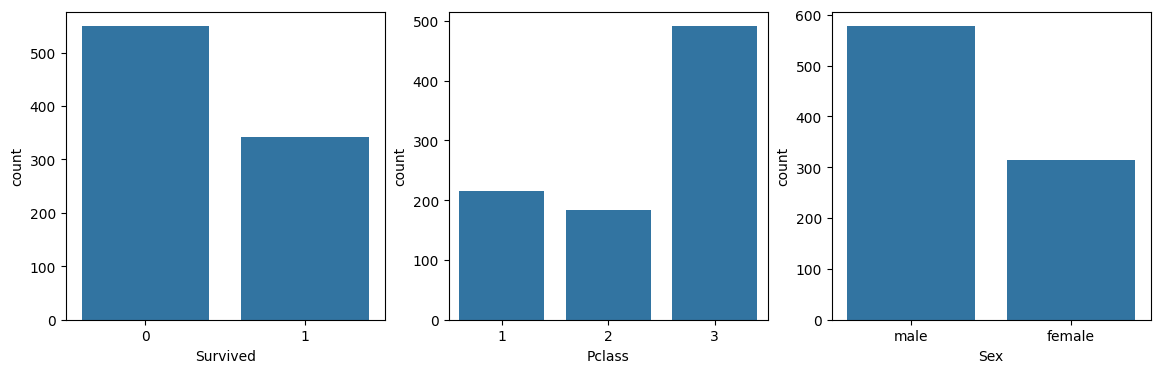

In [26]:
cat_columns = ['Survived', 'Pclass', 'Sex']

# nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index, column in enumerate(cat_columns):
  print('index:', index)
  # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
  sns.countplot(x=column, data=titanic_df, ax=axes[index])

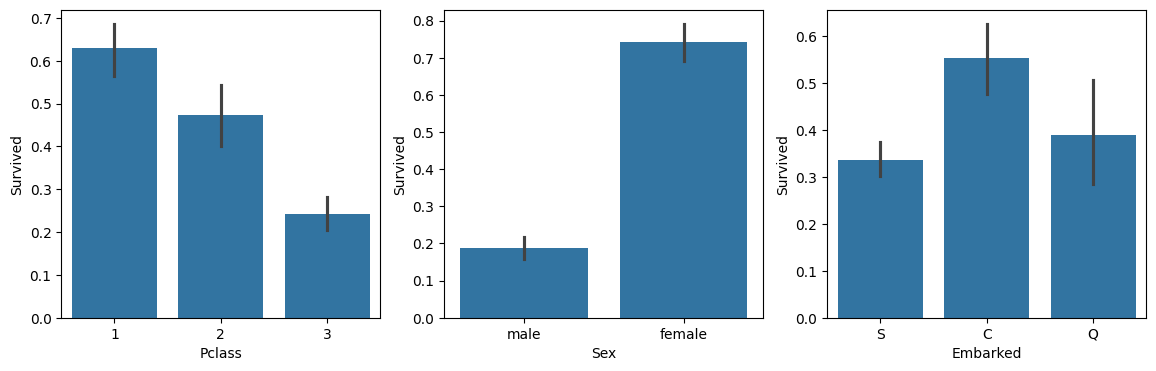

In [29]:
## subplots을 이용하여 Pclass, Sex, Embarked 3개의 이산형 칼럼별로 타깃 칼럼인 Survived값의 평균값, 즉 생존율을 바 플롯으로 시각화

cat_columns = ['Pclass', 'Sex', 'Embarked']

# nrows는 1이고 ncols는 칼럼의 개수만큼인 subplots을 설정.
fig, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(14,4))

for index, column in enumerate(cat_columns):
  # seaborn의 Axes 레벨 function들은 ax 인자로 subplots의 어느 Axes에 위치할지 설정.
  sns.barplot(x=column, y='Survived', data=titanic_df, ax=axes[index])

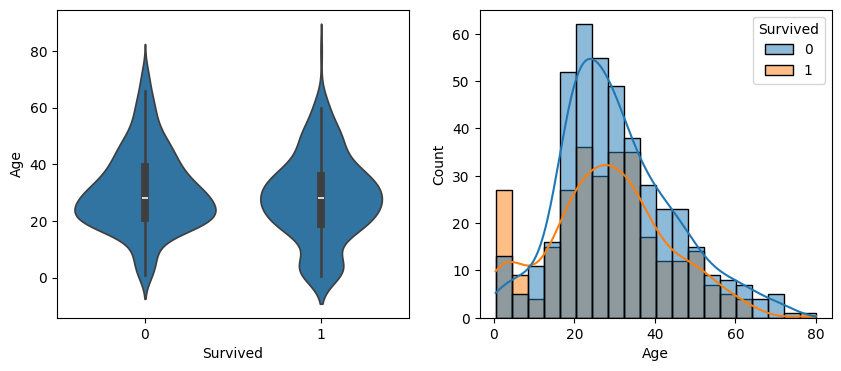

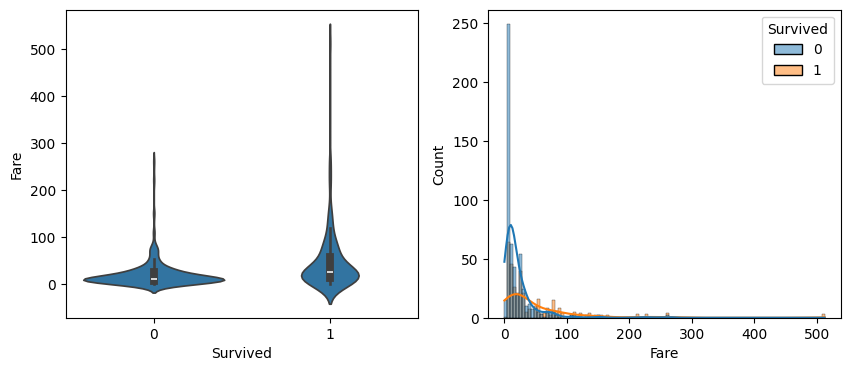

In [30]:
## 연속형 칼럼들에 대해서 타깃 칼럼인 Survived값 0, 1에 따른 데이터 분포도를 확인
## 두 개의 연속형 칼럼 : Age, Fare

count_columns = ['Age', 'Fare']

# 리스트로 할당된 칼럼들의 개수만큼 루프 수행.
for column in count_columns:
  # 왼쪽에는 바이올린 플롯, 오른쪽에는 히스토그램을 시각화. nrows는 1, ncols=2인 서브플롯 생성.
  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
  # 왼쪽 Axes 객체에는 Survived 값 0, 1 별 개별 칼럼의 바이올린 플롯 시각화.
  sns.violinplot(x='Survived', y=column, data=titanic_df, ax=axs[0])
  # 오른쪽 Axes 객체에는 Survived 값 0, 1 별 개별 칼럼의 히스토그램 시각화.
  sns.histplot(x=column, data=titanic_df, kde=True, hue='Survived', ax=axs[1])

* 위 코드에서 각 개별 칼럼 별로 반복해서 plt.subplots(nrows=1, ncols=2, figsize=(10,4))를 호출하여 Figure와 서브플롯 Axes를 새롭게 생성함에 유의.
* 매우 많은 칼럼들을 여러 가지 그래프를 가진 서브플롯들을 많이 사용하여 시각화할 때는, 위와 같이 서로 다른 그래프로 시각화할 서브플롯 두 개를 개별 칼럼별로 할당하고 이들을 모든 칼럼에 순차적으로 반복하여 적용하는 방식이 더 쉬움.

## 산점도, 스캐터 플롯

* 2차원 축 X축과 Y축이 있다면 X축에 해당하는 변숫값과 Y축에 해당하는 변숫값이 만나는 지점에 점을 표시하여 변수 간의 관계를 시각화함.
* 일반적으로 산점도에 사용하는 X축 값, Y축 값 모두 연속형 숫자값을 적용해야 의미 있는 시각화 정보를 얻을 수 있음.

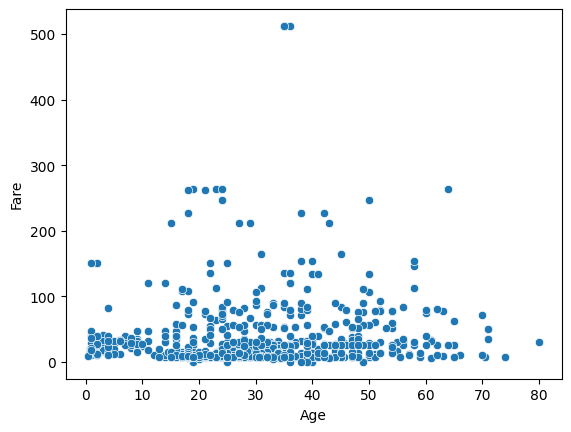

In [31]:
# X축값으로 Age를, Y축값으로 Fare를 설정
sns.scatterplot(x='Age', y='Fare', data=titanic_df)
plt.show()

* scatterplot() 함수도 hue 인자를 지원함.

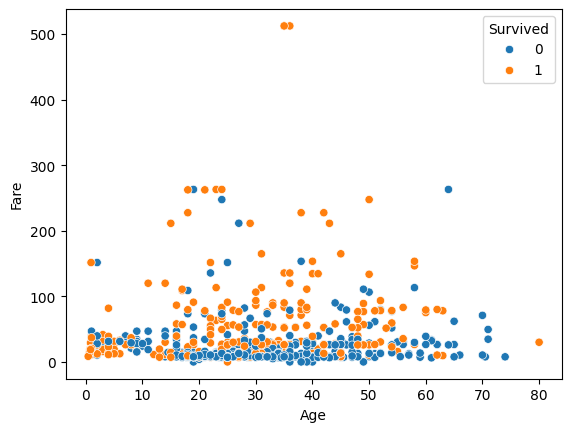

In [33]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=titanic_df)
plt.show()

* scatterplot() 함수는 hue 외에도 style 인자를 이용하여 좀 더 세분화된 구분을 가능하게 할 수 있음.

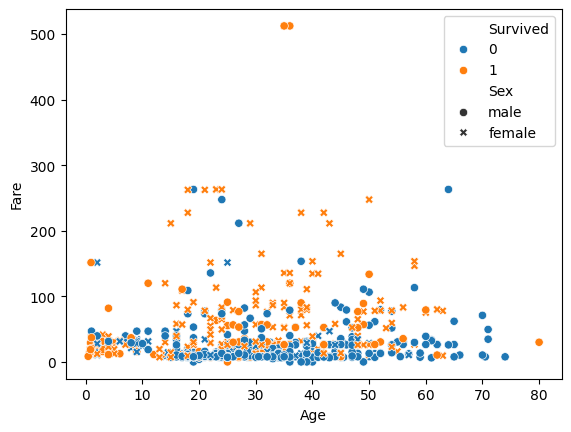

In [35]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', style='Sex', data=titanic_df)
plt.show()

## 상관 히트맵

* 다수의 속성들 간의 상관계수를 히트맵 형태로 나타낼 수 있음.
* 히트맵(Heatmap)은 이름 그대로 열을 의미하는 히트(Heat)와 지도를 의미하는 맵(map)이 결합된 단어임.

* 상관계수는 두 속성들 간의 선형적인 연관 관계를 수치화한 값으로, 두 속성의 값이 서로 상관없으면 0이며, 같은 방향으로 완전히 동일하면 1, 반대 방향으로 완전히 동일하면 -1을 값으로 가짐.
* 상관 히트맵은 다수의 칼럼들 간의 상관 계수를 온도를 연상시키는 여러 가지 색상으로 표현하여 직관적으로 칼럼들 간의 상관도를 이해할 수 있게 해줌.


* heatmap() 함수는 인자로 칼럼들 간의 상관계수를 가지는 DataFrame을 입력받아야 시각화가 가능함.
* 판다스 DataFrame의 corr() 메서드를 호출하면 간단하게 상관계수를 가지는 DataFrame을 생성할 수 있음.

In [37]:
import pandas as pd

In [45]:
titanic_df.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


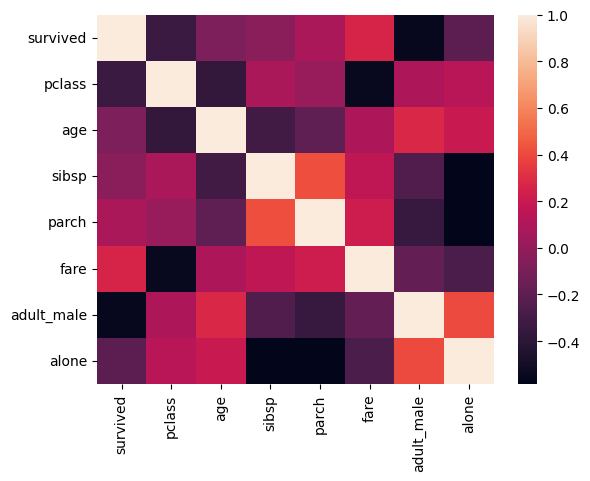

In [47]:
# 상관계수를 DataFrame으로 구하고 이를 heatmap()의 인자로 입력
corr = titanic_df.corr(numeric_only=True)
sns.heatmap(corr)
plt.show()

### heatmap( ) 함수는 여러 인자들로 보다 다양한 시각화를 할 수 있음.
* cmap 인자는 color map으로서 히트맵의 색상을 변경할 수 있게 해줌.
* annot 인자는 True/False로 설정할 수 있으며, True일 경우 숫자로 된 상관계숫값을 표시해 줌.
* annot 인자는 생략될 경우는 False임.
* annot 인자로 숫자 상관계숫값을 표시할 경우에는 정밀도가 너무 높으면 개별 숫자값이 길이가 커져서 서로 겹쳐 보이게 됨. 이 경우 fmt 인자로 숫자값의 포맷을 변환할 수 있음.

* fmt='.1f'로 설정하면 소수점 한 자리까지만 상관계숫값을 표시
* cbar 인자는 True/False로 설정할 수 있으며, True일 경우 숫자값에 따른 색깔 기준 막대로 표시. False는 색깔 기준 막대를 표시하지 않으며, cbar 인자를 생략할 경우 True로 설정됨.

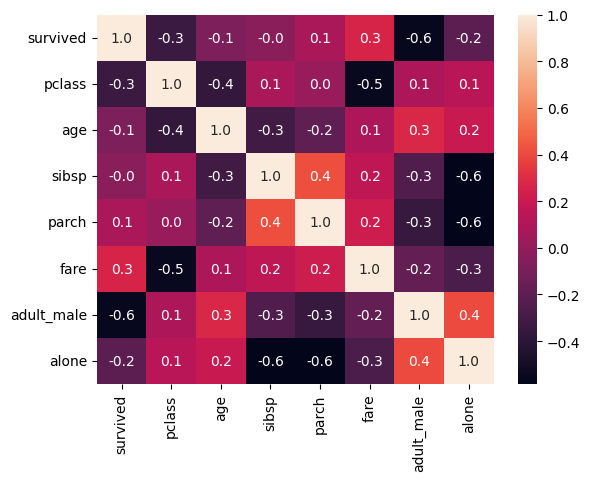

In [48]:
sns.heatmap(corr,annot=True, fmt='.1f', cbar=True)
plt.show()

* 상관 히트맵은 특히 칼럼들이 매우 많을 경우에 활용도가 높음.
* 상관 히트맵을 통해서 어떤 피처들이 타깃값과 밀접한 상관관계를 가지는지를 파악하여 해당 피처에 대한 피처 엔지니어링을 집중적으로 수행한다든지, 상관도가 매우 높다면 상호 간의 높은 종속관계를 의심하여 특정 피처들을 제거하는 용도로 사용될 수 있음.